<a href="https://colab.research.google.com/github/Karenab00/DataScience/blob/main/ProyectoDS_ParteI_Barreto_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este estudio analiza un conjunto de datos sobre el riesgo financiero relacionado con la aprobación de préstamos, que contiene información crucial sobre los solicitantes y sus características financieras. El dataset incluye diversas variables, como la fecha de solicitud, edad, ingreso anual, puntuación de solvencia crediticia y estado de empleo, que ofrecen una visión integral del perfil del solicitante. También se consideran factores como el nivel de educación, experiencia laboral, monto del préstamo solicitado y la duración del mismo, junto con detalles sobre el estado civil, número de dependientes y propiedad de la vivienda.

Además, se incorporan métricas financieras, como los pagos de deuda mensuales, la tasa de utilización de tarjetas de crédito y la relación deuda-ingreso, proporcionando un panorama claro de la salud financiera del solicitante. El historial de quiebras, el comportamiento de pago anterior y la duración del historial crediticio son esenciales para evaluar el riesgo asociado con la aprobación del préstamo.

Este análisis busca identificar patrones y relaciones significativas entre las características de los solicitantes y el estado de aprobación de los préstamos, así como entender cómo diferentes variables afectan la decisión crediticia. A través de esta investigación, se pretende proporcionar información valiosa para entidades financieras en la toma de decisiones más informadas y justas al evaluar solicitudes de préstamos, contribuyendo así a una gestión de riesgos más efectiva y equitativa en el sector financiero.

In [1]:
# ApplicationDate: Fecha de solicitud de préstamo
# Age: Edad del solicitante
# AnnualIncome: Ingreso anual
# CreditScore: Puntuación de crédito
# EmploymentStatus: Situación laboral
# EducationLevel: Nivel educativo más alto alcanzado
# Experience: Experiencia laboral
# LoanAmount: Monto solicitado del préstamo
# LoanDuration: Período de reembolso del préstamo
# MaritalStatus: Estado civil del solicitante
# NumberOfDependents: Número de dependientes
# HomeOwnershipStatus: Tipo de propiedad de vivienda
# MonthlyDebtPayments: Pagos de deuda mensuales
# CreditCardUtilizationRate: Porcentaje de uso de la tarjeta de crédito
# NumberOfOpenCreditLines: Líneas de crédito activas
# NumberOfCreditInquiries: Conteo de verificaciones de crédito
# DebtToIncomeRatio: Proporción de deuda a ingresos
# BankruptcyHistory: Historial de quiebras
# LoanPurpose: Razón del préstamo
# PreviousLoanDefaults: Incumplimientos de préstamos anteriores
# PaymentHistory: Comportamiento de pagos pasados
# LengthOfCreditHistory: Duración del historial crediticio
# SavingsAccountBalance: Saldo de la cuenta de ahorros
# CheckingAccountBalance: Fondos de la cuenta corriente
# TotalAssets: Total de activos
# TotalLiabilities: Total de deudas
# MonthlyIncome: Ingreso mensual
# UtilityBillsPaymentHistory: Registro de pagos de servicios públicos
# JobTenure: Duración en el trabajo
# NetWorth: Patrimonio neto
# BaseInterestRate: Tasa de interés inicial
# InterestRate: Tasa de interés aplicada
# MonthlyLoanPayment: Pago mensual del préstamo
# TotalDebtToIncomeRatio: Relación total de deuda a ingresos
# LoanApproved: Estado de aprobación del préstamo
# RiskScore: Puntuación de riesgo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl


In [3]:
from google.colab import drive
import os
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [4]:
df_prestamos = pd.read_csv('/content/drive/MyDrive/datasc/Riesgo financiero para la aprobacion de prestamos.csv')
df_prestamos

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0


In [5]:
#verifico los nulos
df_prestamos.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [7]:
sns.set(style="whitegrid")


#Grafico de torta donde representa la distribucion de los estados civiles de los clientes (1VAR)


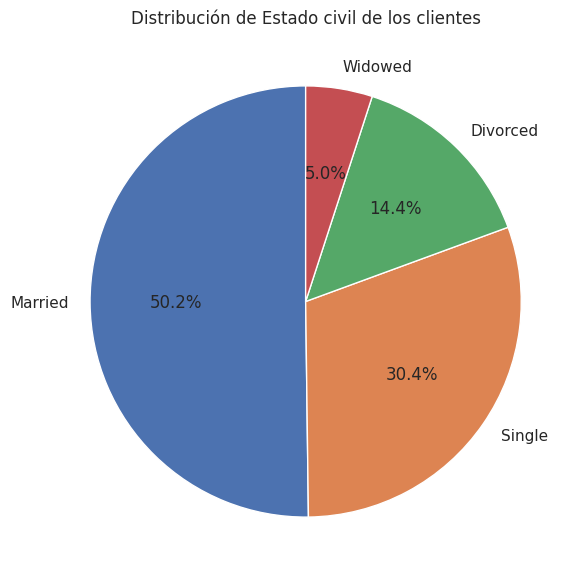

In [84]:
fig, ax = plt.subplots(figsize=(10, 7))
MaritalStatus = df_prestamos['MaritalStatus'].value_counts()
ax.pie(MaritalStatus, labels=MaritalStatus.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribución de Estado civil de los clientes')
plt.show()

Podemos notar en este grafico de tortas, que la mayoria de solicitantes son personas casadas. Esto puede tener muchas respuestas relacionadas al motivo del prestamo. Tambien se puede notar que hay un porcentaje muy bajo en la solicitud de prestamos de personas viudas.

##Diagrama de caja donde muestra una distribucion del monto de prestamo segun los solicitantes (1VAR)


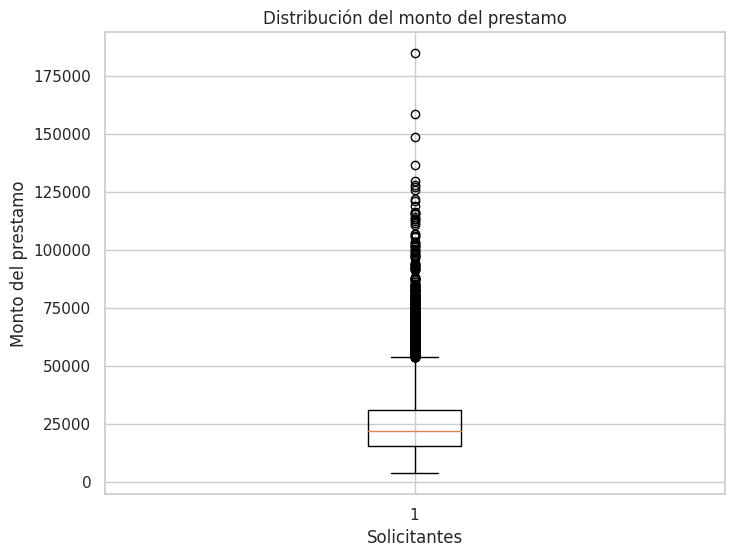

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(df_prestamos.LoanAmount)
ax.set_title('Distribución del monto del prestamo')
ax.set_xlabel('Solicitantes')
ax.set_ylabel('Monto del prestamo')
plt.show()

La mayoría de los préstamos se concentran en un rango moderado de alrededor de 25,000 a 75,000, pero hay varios casos de préstamos considerablemente mayores, lo que genera una distribución asimétrica hacia la derecha. Esto podría ser relevante para entender los diferentes perfiles de clientes y ajustar estrategias de financiamiento o evaluación de riesgos.




#Grafico de torta donde representa la distribucion de los estados civiles de los clientes (1VAR)


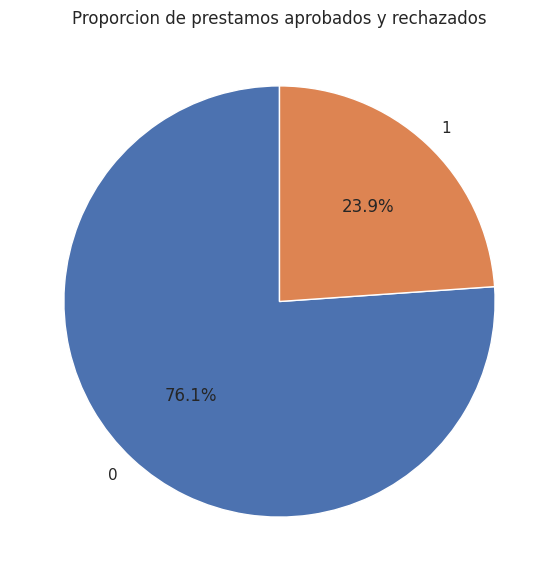

In [83]:
fig, ax = plt.subplots(figsize=(10, 7))
LoanApproved = df_prestamos['LoanApproved'].value_counts()
ax.pie(LoanApproved, labels=LoanApproved.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Proporcion de prestamos aprobados y rechazados')
plt.show()

Este grafico de tortas representa la proporcion de cuantos fueron los prestamos aprobados (0) y cuantos rechazados (1). Hay una diferencia significante entre estos resultados ya que varian demasiado

#Grafico de barras donde representa la distribucion de los niveles de educacion alcanzado por los clientes (1VAR)

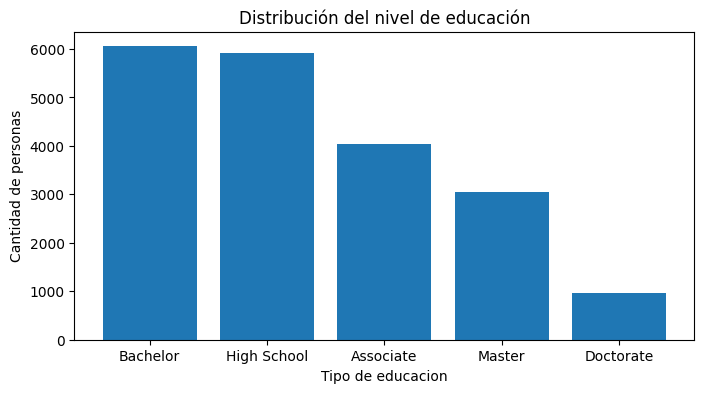

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
EducationLevel = df_prestamos['EducationLevel'].value_counts()
ax.bar(EducationLevel.index, EducationLevel.values)
ax.set_title('Distribución del nivel de educación')
ax.set_xlabel('Tipo de educacion')
ax.set_ylabel('Cantidad de personas')
plt.show()

Los solicitantes con educación de Bachelor (Licenciatura) y High School (Escuela secundaria) son los más numerosos. Esto indica que la mayor parte de los solicitantes se encuentra en estos niveles educativos.
Este gráfico te permite ver cómo está distribuido el nivel educativo entre los solicitantes de préstamos, lo que podría ser útil para analizar si hay diferencias en las características de los préstamos solicitados según la educación de los clientes (como montos, plazos, tasas de interés, etc.).

In [86]:
x = conteo_anios.index
y = conteo_anios.values
x

Index([2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029,
       2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041,
       2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053,
       2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065,
       2066, 2067, 2068, 2069, 2070, 2071, 2072],
      dtype='int32', name='año')

In [87]:
y

array([365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365,
       365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365,
       366, 365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366,
       365, 365, 365, 366, 365, 365, 365, 366, 365, 365, 365, 366, 365,
       365, 365, 277])

##Grafico de lineas donde muestra la variacion de cantidad de solicitudes de prestamos por años

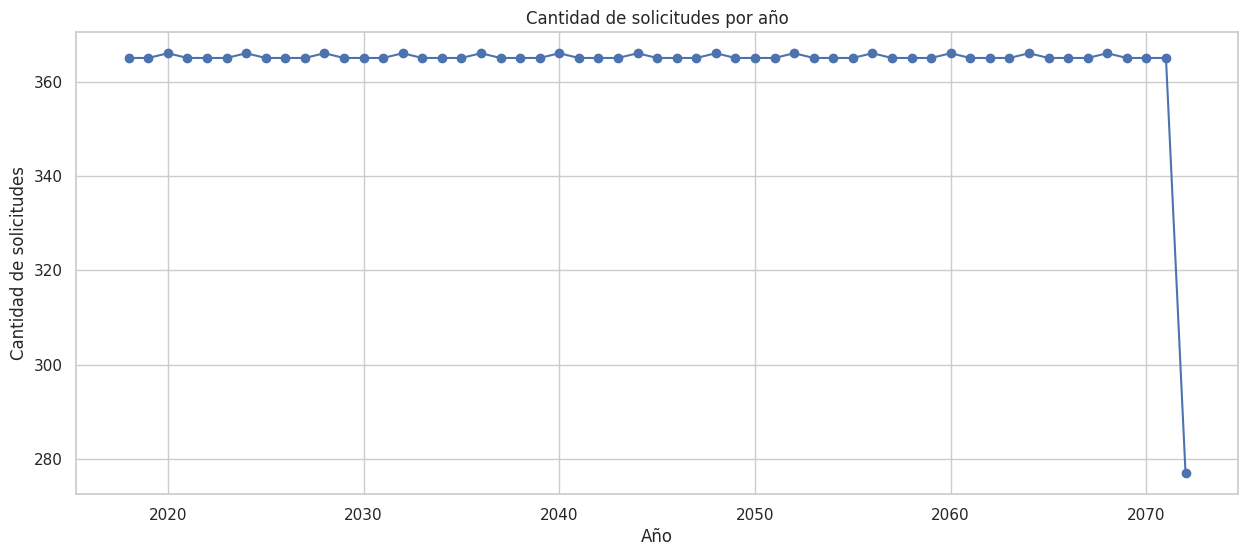

In [85]:
fig, ax = plt.subplots(figsize=(15, 6 ))
ax.plot(x, y, marker='o')
ax.set_title('Cantidad de solicitudes por año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de solicitudes')
plt.show()


##Grafico de lineas donde muestra la relacion entre la edad de los clientes y el monto promedio del prestamo solicitado (2VAR)


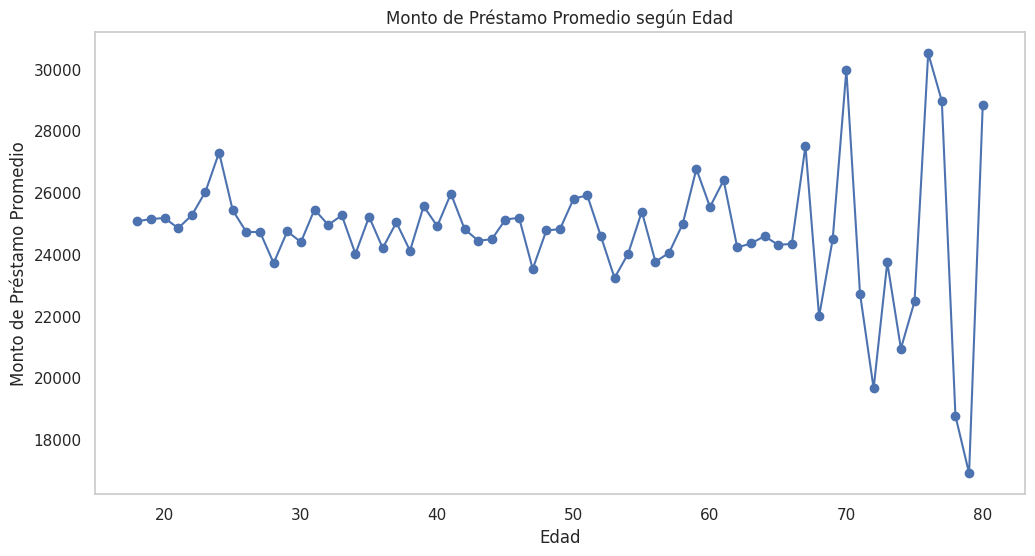

In [76]:
age_loan_trend = df_prestamos.groupby('Age')['LoanAmount'].mean()
plt.figure(figsize=(12, 6))
age_loan_trend.plot(kind='line', marker='o')
plt.title('Monto de Préstamo Promedio según Edad')
plt.xlabel('Edad')
plt.ylabel('Monto de Préstamo Promedio')
plt.grid()
plt.show()



Después de los 60 años, se aprecia una mayor variabilidad en los montos de los préstamos, con algunos picos y caídas bruscas. Esto podría indicar que, en edades más avanzadas, hay una mayor dispersión en las necesidades o capacidades de préstamo, posiblemente influenciada por factores como la jubilación o cambios en la situación económica.


##Grafico de barras apiladas donde muestra la cantidad de prestamos solicitados segun el estado civil y el proposito de cada uno (3VAR)


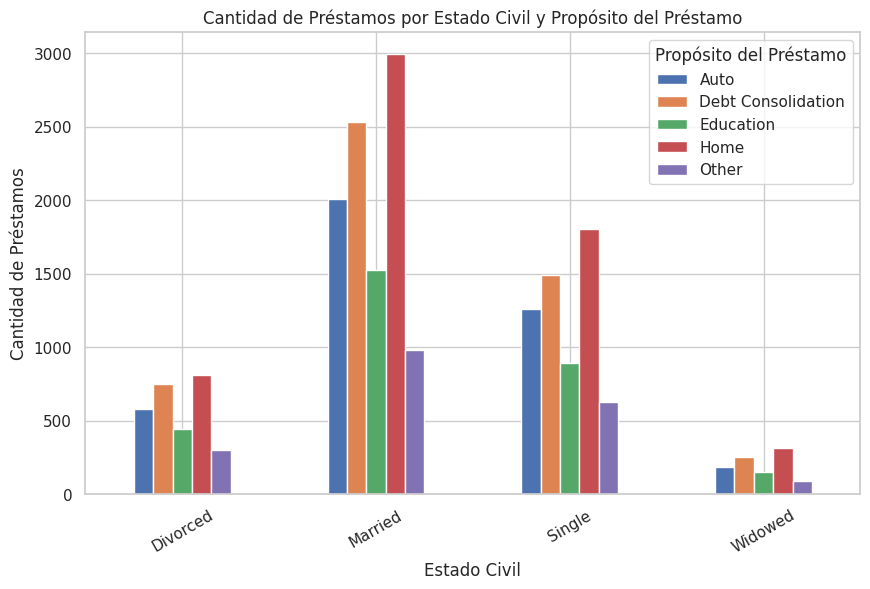

In [72]:
bar_data = df_prestamos.groupby(['MaritalStatus', 'LoanPurpose']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 6))
bar_data.plot(kind='bar', ax=ax, stacked=False)
ax.set_title('Cantidad de Préstamos por Estado Civil y Propósito del Préstamo')
ax.set_xlabel('Estado Civil')
ax.set_ylabel('Cantidad de Préstamos')
ax.legend(title='Propósito del Préstamo')
plt.xticks(rotation=30)
plt.show()



##Histograma donde se representa la distribucion de proporcion Deuda - Ingresos (RATIO) (1VAR)


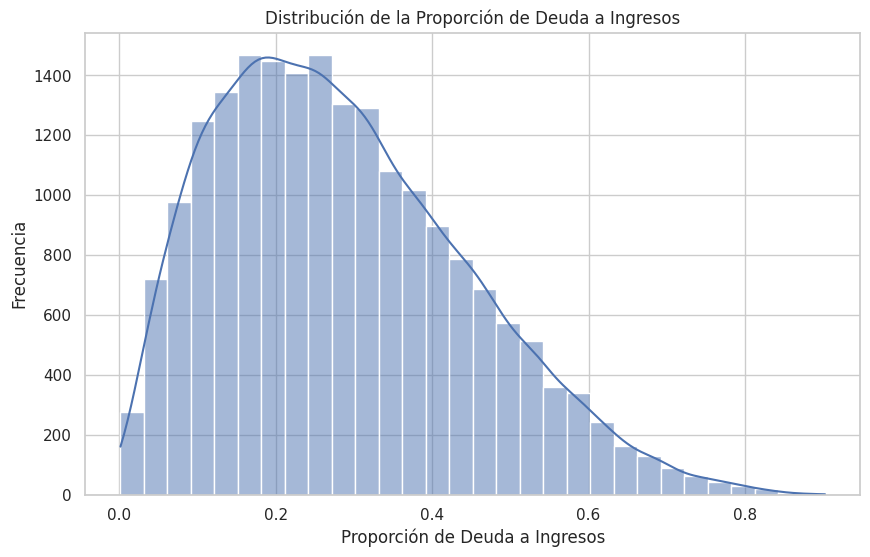

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(df_prestamos['DebtToIncomeRatio'], bins=30, kde=True)
plt.title('Distribución de la Proporción de Deuda a Ingresos')
plt.xlabel('Proporción de Deuda a Ingresos')
plt.ylabel('Frecuencia')
plt.show()


La mayor parte de los datos se concentran en los valores bajos de la proporción deuda/ingresos, entre 0.0 y 0.3, lo cual puede indicar que muchas personas mantienen una deuda baja en relación con sus ingresos. Después de aproximadamente 0.3 en la proporción de deuda a ingresos, hay una caída gradual en la frecuencia, lo que muestra que menos personas tienen una proporción deuda/ingresos más alta.

##Diagrama de caja donde muestra la distribucin de ingresos anuales por el estado laboral (2VAR)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


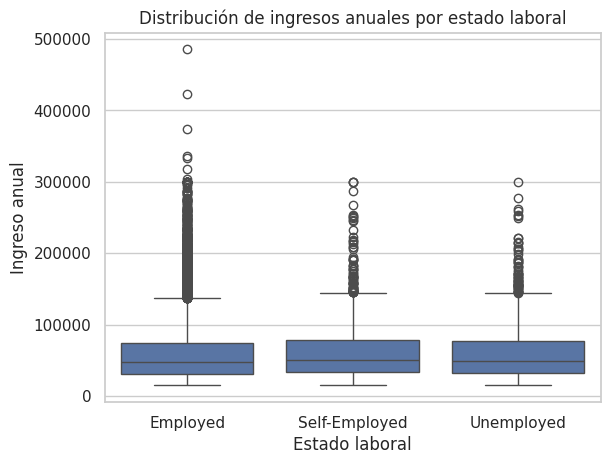

In [22]:
sns.boxplot(x='EmploymentStatus', y='AnnualIncome', data=df_prestamos)
plt.title('Distribución de ingresos anuales por estado laboral')
plt.xlabel('Estado laboral')
plt.ylabel('Ingreso anual')
plt.show()

Los empleados tienden a tener una mayor mediana de ingresos anuales en comparacion con los autonomos y los desempleados.
Estos ultimos tienen una mediana de ingresos mas baja que los otros dos grupos, pero algunos outliers tienen ingresos inusualmente altos, lo que podria representar un error en los datos o ingresos provenientes de otras fuentes.

##Grafico de violin que representa la distribucion de puntuaciones de credito segun la aprobacion del prestamo (2VAR)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


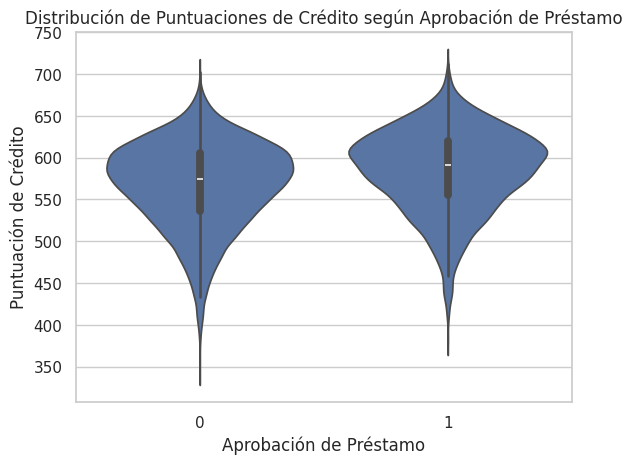

In [88]:
sns.violinplot(x='LoanApproved', y='CreditScore', data=df_prestamos)
plt.title('Distribución de Puntuaciones de Crédito según Aprobación de Préstamo')
plt.xlabel('Aprobación de Préstamo')
plt.ylabel('Puntuación de Crédito')
plt.show()

Las personas con puntuaciones de crédito más *bajas* son rechazadas con mayor frecuencia, mientras que aquellas con puntuaciones de crédito más *altas* tienden a ver sus préstamos *aprobados*. Esto sugiere que la puntuación de crédito sigue siendo un factor determinante en la decisión de aprobar o rechazar una solicitud de préstamo.

##Grafico de dispersion donde muestra la relacion entre ingreso anual y el monto del prestamo de cada solicitante

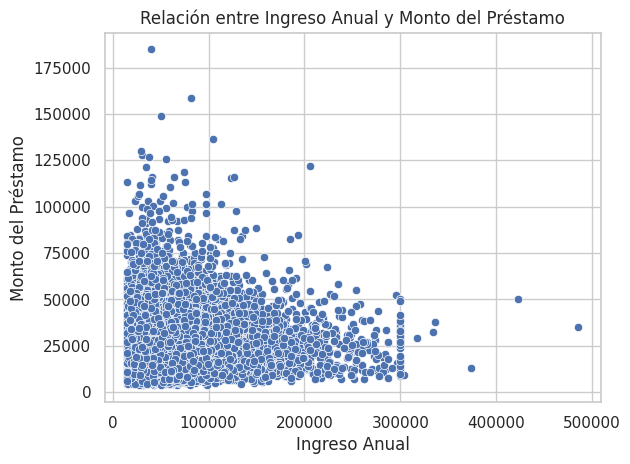

In [23]:
sns.scatterplot(x=df_prestamos['AnnualIncome'], y=df_prestamos['LoanAmount'])
plt.title('Relación entre Ingreso Anual y Monto del Préstamo')
plt.xlabel('Ingreso Anual')
plt.ylabel('Monto del Préstamo')
plt.show()

En este grafico podemos observar una gran aglomeracion en lo que seria menos de 20.000usd anuales como ingreso hasta los 150.000usd. Es notable que aquellas personas que tiene un ingreso anual por debajo de los 100.000usd es la mayoria en los solicitantes del presstamo. Podemos notar unos puntos inusuales (ingreso bajo y monto del prestamo alto), esto puede deberse a un error en la entrada del dato o simplemente situaciones personales de cada solicitante.